In [67]:
import numpy as np
import pandas as pd
# 数据文件地址
data=pd.read_excel(r'C:\Users\江东大宝\Desktop\14-19年空气质量数据.xlsx')
data

,日期,AQI,质量等级,PM2.5,PM10,SO2,CO,NO2,O3
0,2014-01-01,81,良,45,111,28,1.5,62,52
1,2014-01-02,145,轻度污染,111,168,69,3.4,93,14
2,2014-01-03,74,良,47,98,29,1.3,52,56
3,2014-01-04,149,轻度污染,114,147,40,2.8,75,14
4,2014-01-05,119,轻度污染,91,117,36,2.3,67,44
...,...,...,...,...,...,...,...,...,...
2150,2019-11-22,183,中度污染,138,181,9,2.4,94,5
2151,2019-11-23,175,中度污染,132,137,6,1.6,69,34
2152,2019-11-24,30,优,7,30,3,0.2,11,58
2153,2019-11-25,40,优,13,30,3,0.4,32,29


In [68]:
# 数据预处理
# 将数据中0替换成缺失值
data=data.replace(0,np.NaN)

# 将缺失值替换为前一天的数据

# 提取年月
data['年']=data['日期'].apply(lambda x:x.year)
month=data['日期'].apply(lambda x:x.month)
# 设定划分季度
quarter_month={'1':'一季度','2':'一季度','3':'一季度',
               '4':'二季度','5':'二季度','6':'二季度',
               '7':'三季度','8':'三季度','9':'三季度',
              '10':'四季度','11':'四季度','12':'四季度'}
data['季度']=month.map(lambda x:quarter_month[str(x)])
# 划分空气质量等级
bins=[0,50,100,150,200,300,1000]
data['等级']=pd.cut(data['AQI'],bins,labels=['一级优','二级良','三级轻度污染','四级中度污染','五级重度污染','六级严重污染'])
print('对AQI的分组结果：\n{0}'.format(data[['日期','AQI','等级','季度']]))
data

对AQI的分组结果：
           日期    AQI          等级    季度
0    2014-01-01   81.0        二级良  一季度
1    2014-01-02  145.0  三级轻度污染  一季度
2    2014-01-03   74.0        二级良  一季度
3    2014-01-04  149.0  三级轻度污染  一季度
4    2014-01-05  119.0  三级轻度污染  一季度
...         ...    ...           ...     ...
2150 2019-11-22  183.0  四级中度污染  四季度
2151 2019-11-23  175.0  四级中度污染  四季度
2152 2019-11-24   30.0        一级优  四季度
2153 2019-11-25   40.0        一级优  四季度
2154 2019-11-26   73.0        二级良  四季度

[2155 rows x 4 columns]


,日期,AQI,质量等级,PM2.5,PM10,SO2,CO,NO2,O3,年,季度,等级
0,2014-01-01,81.0,良,45.0,111.0,28.0,1.5,62.0,52.0,2014,一季度,二级良
1,2014-01-02,145.0,轻度污染,111.0,168.0,69.0,3.4,93.0,14.0,2014,一季度,三级轻度污染
2,2014-01-03,74.0,良,47.0,98.0,29.0,1.3,52.0,56.0,2014,一季度,二级良
3,2014-01-04,149.0,轻度污染,114.0,147.0,40.0,2.8,75.0,14.0,2014,一季度,三级轻度污染
4,2014-01-05,119.0,轻度污染,91.0,117.0,36.0,2.3,67.0,44.0,2014,一季度,三级轻度污染
...,...,...,...,...,...,...,...,...,...,...,...,...
2150,2019-11-22,183.0,中度污染,138.0,181.0,9.0,2.4,94.0,5.0,2019,四季度,四级中度污染
2151,2019-11-23,175.0,中度污染,132.0,137.0,6.0,1.6,69.0,34.0,2019,四季度,四级中度污染
2152,2019-11-24,30.0,优,7.0,30.0,3.0,0.2,11.0,58.0,2019,四季度,一级优
2153,2019-11-25,40.0,优,13.0,30.0,3.0,0.4,32.0,29.0,2019,四季度,一级优


In [69]:
# 检查每列空值的数量
print(data.isnull().sum())

# 检查每行空值的数量
print(data.isnull().sum(axis=1))

日期         0
AQI          6
质量等级     0
PM2.5        7
PM10        42
SO2          1
CO           1
NO2          1
O3          18
年           0
季度         0
等级         6
dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
2150    0
2151    0
2152    0
2153    0
2154    0
Length: 2155, dtype: int64


In [70]:
# 删除包含空值的行
data.dropna(axis=0, inplace=True)

In [71]:
# 检查每列空值的数量
print(data.isnull().sum())

# 检查每行空值的数量
print(data.isnull().sum(axis=1))

日期        0
AQI         0
质量等级    0
PM2.5       0
PM10        0
SO2         0
CO          0
NO2         0
O3          0
年          0
季度        0
等级        0
dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
2150    0
2151    0
2152    0
2153    0
2154    0
Length: 2096, dtype: int64


In [72]:
# 解决打印对不齐
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
pd.set_option('display.width', 200) # 设置打印宽度

In [73]:
# 各季度AQI和PM2.5的均值:
print('各季度AQI和PM2.5的均值:\n{0}'.format(data.loc[:,['AQI','PM2.5']].groupby(data['季度']).mean()))

各季度AQI和PM2.5的均值:
               AQI      PM2.5
季度                         
一季度  109.327778  77.225926
三季度   98.739777  49.018587
二季度  108.588454  55.018622
四季度  109.871102  77.488565


In [74]:
print('各季度AQI和PM2.5的描述统计量:\n',data.groupby(data['季度'])[['AQI','PM2.5']].apply(lambda x:x.describe()))

各季度AQI和PM2.5的描述统计量:
                      AQI       PM2.5
季度                                
一季度 count  540.000000  540.000000
       mean   109.327778   77.225926
       std     80.405408   73.133857
       min     26.000000    4.000000
       25%     48.000000   24.000000
       50%     80.000000   53.000000
       75%    145.000000  109.250000
       max    470.000000  454.000000
三季度 count  538.000000  538.000000
       mean    98.739777   49.018587
       std     45.498922   35.267792
       min     28.000000    3.000000
       25%     60.000000   22.000000
       50%     95.000000   40.000000
       75%    130.000000   67.000000
       max    252.000000  202.000000
二季度 count  537.000000  537.000000
       mean   108.588454   55.018622
       std     46.851824   35.960483
       min     35.000000    5.000000
       25%     71.000000   27.000000
       50%     99.000000   47.000000
       75%    140.000000   73.000000
       max    342.000000  229.000000
四季度 count  481.000000  481.0

In [75]:
# 对AQI列的数据进行降序排列，然后返回前n个（这里n=10）
def top(df,n=10,column='AQI'):
    return df.sort_values(by=column,ascending=False)[:n] 

In [76]:
print('空气质量最差的5天:\n',top(data,n=5)[['日期','AQI','PM2.5','等级']])

空气质量最差的5天:
            日期    AQI  PM2.5          等级
723  2015-12-25  485.0  477.0  六级严重污染
699  2015-12-01  476.0  464.0  六级严重污染
1095 2017-01-01  470.0  454.0  六级严重污染
698  2015-11-30  450.0  343.0  六级严重污染
1084 2016-12-21  431.0  396.0  六级严重污染


In [77]:
print('各季度空气质量最差的3天:\n',data.groupby(data['季度']).apply(lambda x:top(x,n=3)[['日期','AQI','PM2.5','等级']]))

各季度空气质量最差的3天:
                   日期    AQI  PM2.5          等级
季度                                              
一季度 1095 2017-01-01  470.0  454.0  六级严重污染
       45   2014-02-15  428.0  393.0  六级严重污染
       55   2014-02-25  403.0  354.0  六级严重污染
三季度 186  2014-07-06  252.0  202.0  五级重度污染
       211  2014-07-31  245.0  195.0  五级重度污染
       183  2014-07-03  240.0  190.0  五级重度污染
二季度 1219 2017-05-05  342.0  181.0  六级严重污染
       103  2014-04-14  279.0  229.0  五级重度污染
       1551 2018-04-02  256.0  206.0  五级重度污染
四季度 723  2015-12-25  485.0  477.0  六级严重污染
       699  2015-12-01  476.0  464.0  六级严重污染
       698  2015-11-30  450.0  343.0  六级严重污染


In [78]:
print('各季度空气质量情况:\n',pd.crosstab(data['等级'],data['季度'],margins=True,margins_name='总计',normalize=False))

各季度空气质量情况:
 季度          一季度  三季度  二季度  四季度  总计
等级                                              
一级优           145      95      38      99   377
二级良           170     203     238     216   827
三级轻度污染      99     161     150      60   470
四级中度污染      57      69      96      30   252
五级重度污染      48      10      14      55   127
六级严重污染      21       0       1      21    43
总计             540     538     537     481  2096


In [79]:
# 得到分类变量'等级'的哑变量,生成一个二值变量
pd.get_dummies(data['等级'])
# 数据添加
data.join(pd.get_dummies(data['等级']))

,日期,AQI,质量等级,PM2.5,PM10,SO2,CO,NO2,O3,年,季度,等级,一级优,二级良,三级轻度污染,四级中度污染,五级重度污染,六级严重污染
0,2014-01-01,81.0,良,45.0,111.0,28.0,1.5,62.0,52.0,2014,一季度,二级良,0,1,0,0,0,0
1,2014-01-02,145.0,轻度污染,111.0,168.0,69.0,3.4,93.0,14.0,2014,一季度,三级轻度污染,0,0,1,0,0,0
2,2014-01-03,74.0,良,47.0,98.0,29.0,1.3,52.0,56.0,2014,一季度,二级良,0,1,0,0,0,0
3,2014-01-04,149.0,轻度污染,114.0,147.0,40.0,2.8,75.0,14.0,2014,一季度,三级轻度污染,0,0,1,0,0,0
4,2014-01-05,119.0,轻度污染,91.0,117.0,36.0,2.3,67.0,44.0,2014,一季度,三级轻度污染,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,2019-11-22,183.0,中度污染,138.0,181.0,9.0,2.4,94.0,5.0,2019,四季度,四级中度污染,0,0,0,1,0,0
2151,2019-11-23,175.0,中度污染,132.0,137.0,6.0,1.6,69.0,34.0,2019,四季度,四级中度污染,0,0,0,1,0,0
2152,2019-11-24,30.0,优,7.0,30.0,3.0,0.2,11.0,58.0,2019,四季度,一级优,1,0,0,0,0,0
2153,2019-11-25,40.0,优,13.0,30.0,3.0,0.4,32.0,29.0,2019,四季度,一级优,1,0,0,0,0,0


In [80]:
# 简单随机抽样
# 随机数种子
np.random.seed(0)
# 指定范围抽取10个
sampler=np.random.randint(0,len(data),10)
print("简单随机抽样如下：")
print(sampler)

简单随机抽样如下：
[1653  835  763 1731 1033  277 1778 1828  705 1701]


In [81]:
data.take(sampler)

,日期,AQI,质量等级,PM2.5,PM10,SO2,CO,NO2,O3,年,季度,等级
1706,2018-09-04,43.0,优,7.0,19.0,2.0,0.3,24.0,86.0,2018,三季度,一级优
855,2016-05-06,116.0,轻度污染,57.0,182.0,2.0,0.2,13.0,100.0,2016,二季度,三级轻度污染
783,2016-02-23,41.0,优,11.0,18.0,5.0,0.4,17.0,81.0,2016,一季度,一级优
1784,2018-11-21,49.0,优,21.0,49.0,4.0,0.5,35.0,55.0,2018,四季度,一级优
1069,2016-12-06,112.0,轻度污染,84.0,128.0,21.0,2.3,92.0,11.0,2016,四季度,三级轻度污染
277,2014-10-05,42.0,优,30.0,40.0,2.0,0.7,30.0,67.0,2014,四季度,一级优
1832,2019-01-08,35.0,优,10.0,29.0,4.0,0.5,28.0,62.0,2019,一季度,一级优
1882,2019-02-27,120.0,轻度污染,91.0,106.0,8.0,1.1,60.0,76.0,2019,一季度,三级轻度污染
725,2015-12-27,75.0,良,49.0,100.0,13.0,1.2,53.0,24.0,2015,四季度,二级良
1754,2018-10-22,158.0,中度污染,120.0,116.0,5.0,1.2,58.0,72.0,2018,四季度,四级中度污染


In [82]:
# 随机打乱取前十个
print("条件抽样结果如下：")
sampler=np.random.permutation(len(data))[:10]
print(sampler)

条件抽样结果如下：
[1363 1683 1124 1616 1332 2016 1423 1260 1477 1635]


In [83]:
data.take(sampler)

,日期,AQI,质量等级,PM2.5,PM10,SO2,CO,NO2,O3,年,季度,等级
1400,2017-11-02,71.0,良,52.0,87.0,6.0,1.0,57.0,56.0,2017,四季度,二级良
1736,2018-10-04,74.0,良,46.0,74.0,8.0,1.0,56.0,128.0,2018,四季度,二级良
1160,2017-03-07,40.0,优,7.0,23.0,3.0,0.4,15.0,80.0,2017,一季度,一级优
1669,2018-07-29,130.0,轻度污染,65.0,78.0,3.0,1.1,24.0,192.0,2018,三季度,三级轻度污染
1369,2017-10-02,44.0,优,13.0,43.0,3.0,0.6,35.0,36.0,2017,四季度,一级优
2070,2019-09-03,178.0,中度污染,48.0,83.0,3.0,0.7,39.0,243.0,2019,三季度,四级中度污染
1472,2018-01-13,139.0,轻度污染,106.0,122.0,15.0,1.7,79.0,17.0,2018,一季度,三级轻度污染
1297,2017-07-22,38.0,优,23.0,34.0,2.0,0.7,31.0,77.0,2017,三季度,一级优
1526,2018-03-08,61.0,良,43.0,72.0,6.0,0.7,34.0,70.0,2018,一季度,二级良
1688,2018-08-17,137.0,轻度污染,28.0,57.0,2.0,0.6,36.0,200.0,2018,三季度,三级轻度污染


In [84]:
# 条件抽样
data.loc[data['质量等级']=='良',:]

,日期,AQI,质量等级,PM2.5,PM10,SO2,CO,NO2,O3,年,季度,等级
0,2014-01-01,81.0,良,45.0,111.0,28.0,1.5,62.0,52.0,2014,一季度,二级良
2,2014-01-03,74.0,良,47.0,98.0,29.0,1.3,52.0,56.0,2014,一季度,二级良
9,2014-01-10,85.0,良,63.0,94.0,53.0,1.9,71.0,19.0,2014,一季度,二级良
17,2014-01-18,99.0,良,74.0,81.0,42.0,1.5,61.0,36.0,2014,一季度,二级良
25,2014-01-26,72.0,良,53.0,81.0,45.0,1.0,47.0,44.0,2014,一季度,二级良
...,...,...,...,...,...,...,...,...,...,...,...,...
2144,2019-11-16,65.0,良,47.0,80.0,9.0,1.3,52.0,13.0,2019,四季度,二级良
2146,2019-11-18,74.0,良,19.0,98.0,2.0,0.3,20.0,53.0,2019,四季度,二级良
2147,2019-11-19,56.0,良,20.0,62.0,2.0,0.4,32.0,49.0,2019,四季度,二级良
2148,2019-11-20,87.0,良,61.0,124.0,8.0,0.9,69.0,15.0,2019,四季度,二级良


In [85]:
data

,日期,AQI,质量等级,PM2.5,PM10,SO2,CO,NO2,O3,年,季度,等级
0,2014-01-01,81.0,良,45.0,111.0,28.0,1.5,62.0,52.0,2014,一季度,二级良
1,2014-01-02,145.0,轻度污染,111.0,168.0,69.0,3.4,93.0,14.0,2014,一季度,三级轻度污染
2,2014-01-03,74.0,良,47.0,98.0,29.0,1.3,52.0,56.0,2014,一季度,二级良
3,2014-01-04,149.0,轻度污染,114.0,147.0,40.0,2.8,75.0,14.0,2014,一季度,三级轻度污染
4,2014-01-05,119.0,轻度污染,91.0,117.0,36.0,2.3,67.0,44.0,2014,一季度,三级轻度污染
...,...,...,...,...,...,...,...,...,...,...,...,...
2150,2019-11-22,183.0,中度污染,138.0,181.0,9.0,2.4,94.0,5.0,2019,四季度,四级中度污染
2151,2019-11-23,175.0,中度污染,132.0,137.0,6.0,1.6,69.0,34.0,2019,四季度,四级中度污染
2152,2019-11-24,30.0,优,7.0,30.0,3.0,0.2,11.0,58.0,2019,四季度,一级优
2153,2019-11-25,40.0,优,13.0,30.0,3.0,0.4,32.0,29.0,2019,四季度,一级优


In [86]:
data.to_excel(r'C:\Users\江东大宝\Desktop\14-19年空气质量数据1.xlsx', index=False)

Text(703, 465, '空气质量最差日')

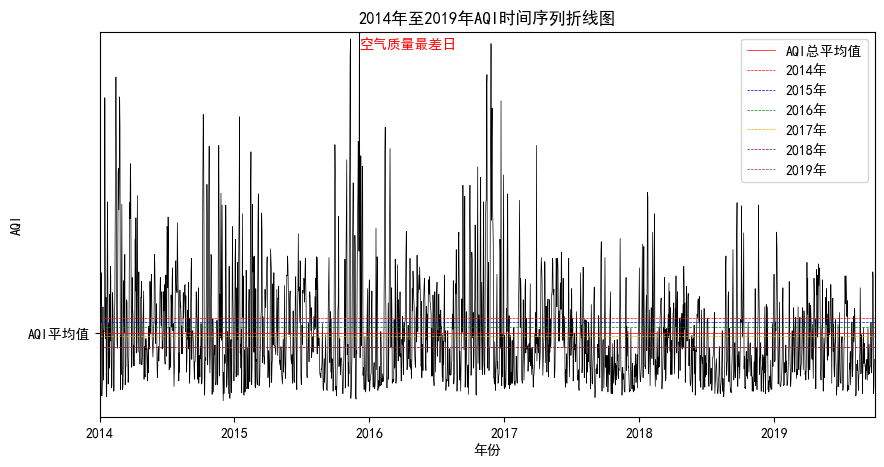

In [87]:
# 绘图
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei'] 
# 用来正常显示负号
plt.rcParams['axes.unicode_minus']=False

# 导入数据
data=pd.read_excel(r'C:\Users\江东大宝\Desktop\14-19年空气质量数据1.xlsx')
# 创建图形
plt.figure(figsize=(10,5))
# 绘制空气质量折线
plt.plot(data['AQI'],color='black',linestyle='-',linewidth=0.5)
# 空气质量平均值
plt.axhline(y=data['AQI'].mean(),color='red', linestyle='-',linewidth=0.5,label='AQI总平均值')
# 提取年
data['年']=data['日期'].apply(lambda x:x.year)
# 提取空气质量年平均
AQI_mean=data['AQI'].groupby(data['年']).mean().values
# 设定颜色
year=['2014年','2015年','2016年','2017年','2018年','2019年']
col=['red','blue','green','orange','purple','brown']
# 绘制每年平均
for i in range(6):
    plt.axhline(y=AQI_mean[i],color=col[i], linestyle='--',linewidth=0.5,label=year[i])

# 标题 坐标轴
plt.title('2014年至2019年AQI时间序列折线图')
plt.xlabel('年份')
plt.ylabel('AQI')
# 设定所有数据都会被显示
plt.xlim(xmax=len(data), xmin=1)
plt.ylim(ymax=data['AQI'].max(),ymin=1)
# 添加文本
plt.yticks([data['AQI'].mean()],['AQI平均值'])
plt.xticks([1,365,365*2,365*3,365*4,365*5],['2014','2015','2016','2017','2018','2019'])
# 添加图例
plt.legend(loc='best')
# 标出空气质量最差的一天
plt.text(x=list(data['AQI']).index(data['AQI'].max()),y=data['AQI'].max()-20,s='空气质量最差日',color='red')

Text(0.5, 1.0, '空气质量整体情况的饼图')

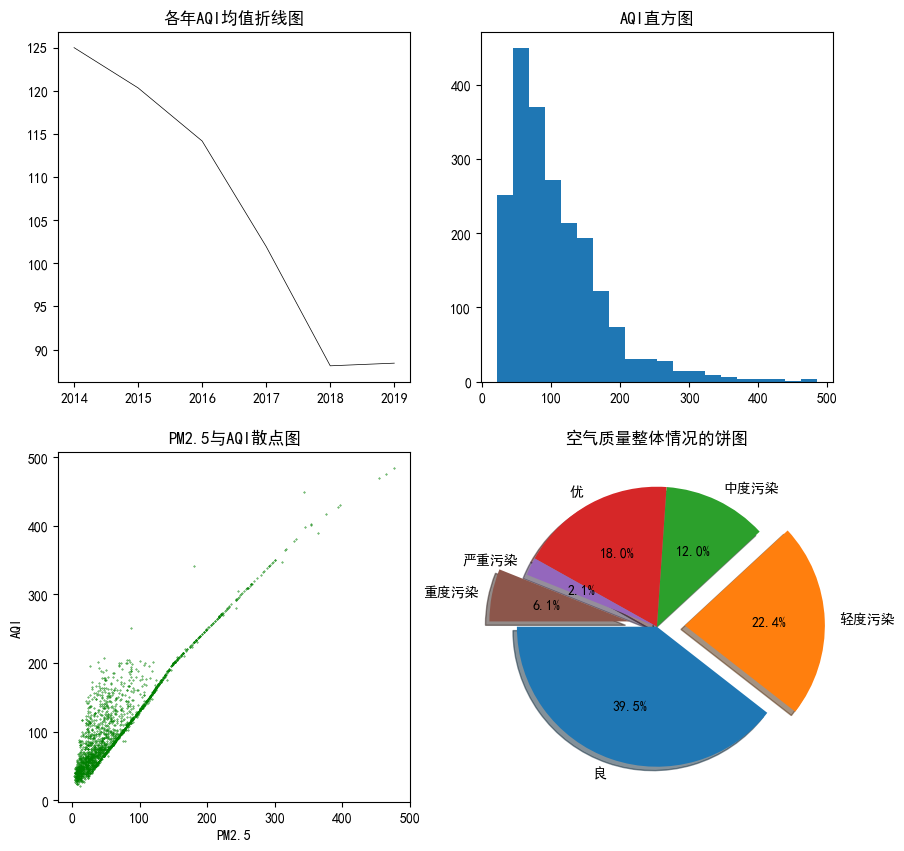

In [88]:
# 添加绘图
%matplotlib inline
# 控制忽略所有警告信息
import warnings
warnings.filterwarnings(action = 'ignore')

# 设定大小 划分区域
plt.figure(figsize=(10,10))

# 左上折线图
plt.subplot(2,2,1)
plt.plot(AQI_mean,color='black',linestyle='-',linewidth=0.5)
plt.title('各年AQI均值折线图')
plt.xticks([0, 1, 2, 3, 4, 5],['2014','2015','2016','2017','2018','2019'])

# 右上直方图
plt.subplot(2,2,2)
plt.hist(data['AQI'], bins=20)
plt.title('AQI直方图')

# 左下散点图
plt.subplot(2,2,3)
plt.scatter(data['PM2.5'],data['AQI'],s=0.5,c='green',marker='.')
plt.title('PM2.5与AQI散点图')
plt.xlabel('PM2.5')
plt.ylabel('AQI')

# 右下饼图
plt.subplot(2,2,4)
tmp=pd.value_counts(data['质量等级'],sort=False)  #等同：tmp=data['质量等级'].value_counts()
share=tmp/sum(tmp)
labels=tmp.index
explode = [0, 0.2, 0, 0, 0,0.2]
plt.pie(share, explode = explode,labels = labels, autopct = '%3.1f%%',startangle = 180, shadow = True)
plt.title('空气质量整体情况的饼图')

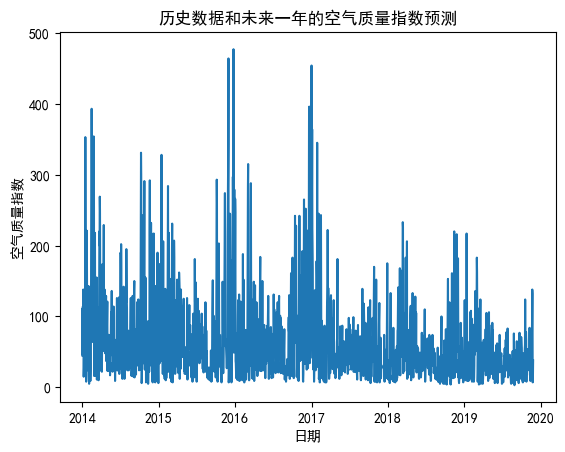

2019-11-27    38.608223
2019-11-28    38.955871
2019-11-29    39.154578
2019-11-30    39.268155
2019-12-01    39.333073
                ...    
2020-11-21    39.419684
2020-11-22    39.419684
2020-11-23    39.419684
2020-11-24    39.419684
2020-11-25    39.419684
Freq: D, Name: predicted_mean, Length: 365, dtype: float64


In [130]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 读取Excel文件并转换为时间序列
df = pd.read_excel(r'C:\Users\江东大宝\Desktop\14-19年空气质量数据1.xlsx')
df['日期'] = pd.to_datetime(df['日期'])
ts_data = df[['日期', 'PM2.5']]
ts_data.set_index('日期', inplace=True)

# 将时间序列数据转换为带有固定日度频率的形式
ts_data_daily = ts_data.resample('D').mean()

# 绘制PM2.5时间序列图
plt.plot(ts_data)
plt.xlabel('日期')
plt.ylabel('空气质量指数')
plt.title('历史数据和未来一年的空气质量指数预测')
plt.show()

# 拟合ARIMA模型并进行预测
model = ARIMA(ts_data_daily, order=(1, 1, 1))
results = model.fit()
forecast = results.forecast(steps=365)  # 预测未来365天的数据

# 显示预测结果
print(forecast)

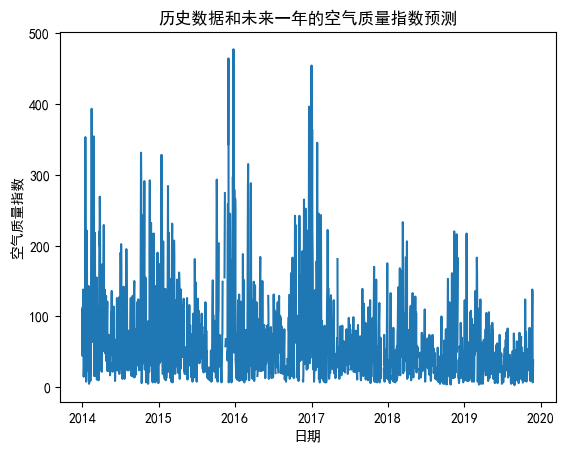

2019-11-27    37.695676
2019-11-28    37.991172
2019-11-29    37.605284
2019-11-30    37.774218
2019-12-01    40.086789
                ...    
2020-11-21    39.491615
2020-11-22    39.491615
2020-11-23    39.491615
2020-11-24    39.491615
2020-11-25    39.491615
Freq: D, Name: predicted_mean, Length: 365, dtype: float64


In [131]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 读取Excel文件并转换为时间序列
df = pd.read_excel(r'C:\Users\江东大宝\Desktop\14-19年空气质量数据1.xlsx')
df['日期'] = pd.to_datetime(df['日期'])
ts_data = df[['日期', 'PM2.5']]
ts_data.set_index('日期', inplace=True)

# 将时间序列数据转换为带有固定日度频率的形式
ts_data_daily = ts_data.resample('D').mean()

# 绘制PM2.5时间序列图
plt.plot(ts_data_daily)
plt.xlabel('日期')
plt.ylabel('空气质量指数')
plt.title('历史数据和未来一年的空气质量指数预测')
plt.show()

# 拟合SARIMA模型并进行预测
model = SARIMAX(ts_data_daily, order=(1, 1, 1), seasonal_order=(1, 0, 1, 7))
results = model.fit()
forecast = results.forecast(steps=365)  # 预测未来365天的数据

# 显示预测结果
print(forecast)
